In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('C:/Users/ishik/Downloads/archive (2)/vehicles.csv')

In [3]:
# Getting info on type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
# Calculating total no. of null values in each column as we saw there multiple nan values in columns
df.isnull().sum()   

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
#Dropping the columns which is not usable or have high percentage of null values in order to reduce the size of data 
# which will decrease the processing time as well
df.drop(columns=['id','url','region_url','VIN','image_url','description','county','posting_date','size','lat','long'],inplace=True)

In [6]:
# Count duplicate rows
duplicate_count = df[df.duplicated()].shape[0]
# Print the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 56491


In [7]:
# Drop duplicate rows
df = df.drop_duplicates()
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [8]:
df = df[(df['year'] > 1989) & (df['price'].between(2000, 70000))]


# Show the filtered data
print(df)

         region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 sport suv 4d   
426878  wyoming  28990  2018.0        lexus           es 350 sedan 4d   
426879  wyoming  30590  2019.0          bmw  4 series 430i gran coupe   

        condition    cylinders    fuel  odometer title_status transmission  \
27           good  8 cylinders     gas   5792

In [9]:
df.isnull().sum()

region               0
price                0
year                 0
manufacturer     10087
model             2736
condition       110550
cylinders       127705
fuel              1855
odometer          1529
title_status      4928
transmission      1453
drive            94315
type             63778
paint_color      85789
state                0
dtype: int64

In [10]:
##imputing values in null cells of manufacturer column based on the corresponding model of the car
# Step 1: Rearrange the 'model' column
df['model'] = sorted(df['model'], key=lambda x: (not str(x).isdigit(), str(x)))

# Step 2: Split the 'model' column and keep only the first value
df['model'] = df['model'].str.split().str[0]

# Step 3: Filter and show only the unique values
unique_models = df['model'].unique()
print(unique_models)

C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\3769923785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = sorted(df['model'], key=lambda x: (not str(x).isdigit(), str(x)))


['1' '100000' '107566' ... '♿' '𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼' '🔥GMC']


C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\3769923785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split().str[0]


In [11]:
#creating a variable which contains all the rows with null values in manufacturer column
#which we can impute based on the model column
null_manufacturer_rows = df[df['manufacturer'].isnull()]

In [12]:
# Define a mapping dictionary with models as keys and manufacturers as values
model_to_manufacturer = {
    '200sl': 'Mercedes-Benz',
    '228i': 'BMW',
    '230i': 'BMW',
    '240d': 'Mercedes-Benz',
    '240z': 'Datsun',
    '2500hd': 'GMC',
    '280zx': 'Datsun',
    '3-series': 'BMW',
    '300-series': 'Lexus',
    '3000gt': 'Mitsubishi',
    '300zx': 'Nissan',
    '320i': 'BMW',
    '325i': 'BMW',
    '325is': 'BMW',
    '328i': 'BMW',
    '328xi': 'BMW',
    '330ci': 'BMW',
    '330i': 'BMW',
    '330xi': 'BMW',
    '335i': 'BMW',
    '3500hd': 'GMC',
    '350z': 'Nissan',
    '370z': 'Nissan',
    '4-runner': 'Toyota',
    '428i': 'BMW',
    '430i': 'BMW',
    '450gl': 'Mercedes-Benz',
    '450slc': 'Mercedes-Benz',
    '4runner': 'Toyota',
    '5-series': 'BMW',
    '500c': 'Fiat',
    '500sl': 'Mercedes-Benz',
    '500x': 'Fiat',
    '525i': 'BMW',
    '528i': 'BMW',
    '528xi': 'BMW',
    '530i': 'BMW',
    '535i': 'BMW',
    '540i': 'BMW',
    '550i': 'BMW',
    '645ci': 'BMW',
    '650i': 'BMW',
    '7-series': 'BMW',
    '740li': 'BMW',
    '750li': 'BMW',
    'AM': 'Aston Martin',
    'AMC': 'AMC',
    'BMX': 'BMW',
    'Bentley': 'Bentley',
    'Blue': 'Blue Bird',
    'CHASSIS': 'CHASSIS',
    'CHEC': 'CHEC',
    'CHECKER': 'Checker',
    'CHEV.': 'Chevrolet',
    'CHOVROLET': 'Chevrolet',
    'Corolla': 'Toyota',
    'E350': 'Mercedes-Benz',
    'ELANTRA': 'Hyundai',
    'ELEMENT': 'Honda',
    'ES': 'Lexus',
    'Escape': 'Ford',
    'F-150': 'Ford',
    'F-250': 'Ford',
    'F0RD': 'Ford',
    'F150': 'Ford',
    'F450': 'Ford',
    'FORD/MUSTANG': 'Ford',
    'Foed': 'Ford',
    'For': 'Ford',
    'Ford,': 'Ford',
    'Freightliner': 'Freightliner',
    'GEM': 'GEM',
    'Genesis': 'Hyundai',
    'HUMMER': 'Hummer',
    'Hino': 'Hino',
    'IHC': 'International Harvester',
    'INTERNATIONAL': 'International Harvester',
    'Internatioal': 'International Harvester',
    'International': 'International Harvester',
    'Isuzu': 'Isuzu',
    'Lamborghini': 'Lamborghini',
    'MB': 'Mercedes-Benz',
    'MINI/COOPER': 'MINI',
    'Maserati': 'Maserati',
    'Mazda3': 'Mazda',
    'Mercede-Benz': 'Mercedes-Benz',
    'MiniCooper': 'MINI',
    'Mustang': 'Ford',
    'OLDSMOBILE': 'Oldsmobile',
    'Oldsmobile': 'Oldsmobile',
    'PETERBILT': 'Peterbilt',
    'PT': 'Chrysler',
    'Plymouth': 'Plymouth',
    'Pontica': 'Pontiac',
    'Rolls': 'Rolls-Royce',
    'STERLING': 'Sterling',
    'Saab': 'Saab',
    'Scion': 'Toyota',
    'Suabru': 'Subaru',
    'Subaro': 'Subaru',
    'Town': 'Chrysler',
    'Triumph': 'Triumph',
    'WANTED!': 'WANTED!',
    'WPOAA2993XS620614': 'Porsche',
    'Workhorse': 'Workhorse',
    'XLT': 'Ford',
    'Yamaha': 'Yamaha',
    'a-class': 'Mercedes-Benz',
    'a3': 'Audi',
    'a4': 'Audi',
    'a5': 'Audi',
    'a6': 'Audi',
    'a7': 'Audi',
    'a8': 'Audi',
    'acadia': 'GMC',
    'accent': 'Hyundai',
    'accord': 'Honda',
    'acty': 'Honda',
    'aerostar': 'Ford',
    'alanta': 'Chevrolet',
    'all-new': 'Mitsubishi',
    'allroad': 'Audi',
    'altima': 'Nissan',
    'amanti': 'Kia',
    'amc': 'AMC',
    'armada': 'Nissan',
    'arteon': 'Volkswagen',
    'ascent': 'Subaru',
    'astra': 'Saturn',
    'astro': 'Chevrolet',
    'atlas': 'Volkswagen',
    'ats': 'Cadillac',
    'aura': 'Saturn',
    'avalanche': 'Chevrolet',
    'avalon': 'Toyota',
    'avenger': 'Dodge',
    'aveo': 'Chevrolet',
    'azera': 'Hyundai',
    'b3000': 'Mazda',
    'b4000': 'Mazda',
    'baja': 'Subaru',
    'beetle': 'Volkswagen',
    'beetle-classic': 'Volkswagen',
    'bel': 'Chevrolet',
    'belair': 'Chevrolet',
    'benz': 'Mercedes-Benz',
    'blazer': 'Chevrolet',
    'bolt': 'Chevrolet',
    'bonanza': 'Chevrolet',
    'bonneville': 'Pontiac',
    'boxster': 'Porsche',
    'bronco': 'Ford',
    'brz': 'Subaru',
    'c': 'Chrysler',
    'c-10': 'Chevrolet',
    'c-class': 'Mercedes-Benz',
    'c-hr': 'Toyota',
    'c-max': 'Ford',
    'c/k': 'Chevrolet',
    'c10': 'Chevrolet',
    'c230': 'Mercedes-Benz',
    'c280': 'Mercedes-Benz',
    'c300': 'Mercedes-Benz',
    'c4500': 'GMC',
    'c5500': 'GMC',
    'cabellero': 'GMC',
    'cabriolet': 'Volkswagen',
    'caddilac': 'Cadillac',
    'cadenza': 'Kia',
    'camaro': 'Chevrolet',
    'camry': 'Toyota',
    'canyon': 'GMC',
    'capri': 'Ford',
    'caprice': 'Chevrolet',
    'captiva': 'Chevrolet',
    'caravan': 'Dodge',
    'cargo': 'Chevrolet',
    'cavalier': 'Chevrolet',
    'cayenne': 'Porsche',
    'cayman': 'Porsche',
    'cc': 'Volkswagen',
    'cc4500': 'Chevrolet',
    'celica': 'Toyota',
    'centra': 'Nissan',
    'century': 'Buick',
    'challenger': 'Dodge',
    'challengers': 'Dodge',
    'charger': 'Dodge',
    'cherokee': 'Jeep',
    'chevelle': 'Chevrolet',
    'chevorlet': 'Chevrolet',
    'chryler': 'Chrysler',
    'civic': 'Honda',
    'cj5': 'Jeep',
    'cl': 'Acura',
    'cl-class': 'Mercedes-Benz',
    'cla': 'Mercedes-Benz',
    'cla-class': 'Mercedes-Benz',
    'cla45': 'Mercedes-Benz',
    'clarity': 'Honda',
    'clk': 'Mercedes-Benz',
    'clk-class': 'Mercedes-Benz',
    'clk320': 'Mercedes-Benz',
    'clk350': 'Mercedes-Benz',
    'clk550': 'Mercedes-Benz',
    'cls': 'Mercedes-Benz',
    'cls-class': 'Mercedes-Benz',
    'club': 'Mercedes-Benz',
    'cmax': 'Ford',
    'cobalt': 'Chevrolet',
    'colbalt': 'Chevrolet',
    'colorado': 'Chevrolet',
    'commander': 'Jeep',
    'compass': 'Jeep',
    'continental': 'Lincoln',
    'convertible': 'BMW',
    'cooper': 'MINI',
    'corolla': 'Toyota',
    'corolla..le': 'Toyota',
    'corsair': 'Lincoln',
    'corvair': 'Chevrolet',
    'corvette': 'Chevrolet',
    'cougar': 'Mercury',
    'countryman': 'MINI',
    'coupe': 'BMW',
    'cr-v': 'Honda',
    'cr-z': 'Honda',
    'crossfire': 'Chrysler',
    'crosstrek': 'Subaru',
    'crown': 'Toyota',
    'cruse': 'Chevrolet',
    'cruze': 'Chevrolet',
    'crv': 'Honda',
    'ct': 'Lexus',
    'ct4': 'Cadillac',
    'ct5': 'Cadillac',
    'ct6': 'Cadillac',
    'cts': 'Cadillac',
    'cts-v': 'Cadillac',
    'ctsv': 'Cadillac',
    'cube': 'Nissan',
    'cummin': 'Cummins',
    'cummins': 'Cummins',
    'cv': 'Chevrolet',
    'cx-3': 'Mazda',
    'cx-5': 'Mazda',
    'cx-7': 'Mazda',
    'cx-9': 'Mazda',
    'cx9': 'Mazda',
    'dakota': 'Dodge',
    'dart': 'Dodge',
    'deisel': 'Diesel',
    'deluxe': 'Ford',
    'deville': 'Cadillac',
    'diesel': 'Diesel',
    'discovery': 'Land Rover',
    'dts': 'Cadillac',
    'durango': 'Dodge',
    'e': 'Mercedes-Benz',
    'e-150': 'Ford',
    'e-250': 'Ford',
    'e-350': 'Ford',
    'e-450': 'Ford',
    'e-class': 'Mercedes-Benz',
    'e-golf': 'Volkswagen',
    'e-pace': 'Jaguar',
    'e-series': 'Ford',
    'e150': 'Ford',
    'e250': 'Ford',
    'e350': 'Ford',
    'e450': 'Ford',
    'e550': 'Ford',
    'eagle': 'Eagle',
    'echo': 'Toyota',
    'eclipse': 'Mitsubishi',
    'eclipses': 'Mitsubishi',
    'econoline': 'Ford',
    'ecosport': 'Ford',
    'edge': 'Ford',
    'el': 'Chevrolet',
    'elantra': 'Hyundai',
    'eldorado': 'Cadillac',
    'element': 'Honda',
    'enclave': 'Buick',
    'encore': 'Buick',
    'endeavor': 'Mitsubishi',
    'entourage': 'Hyundai',
    'envoy': 'GMC',
    'envoy/sle': 'GMC',
    'eos': 'Volkswagen',
    'equinox': 'Chevrolet',
    'equus': 'Hyundai',
    'es300': 'Lexus',
    'es330': 'Lexus',
    'es350': 'Lexus',
    'escalade': 'Cadillac',
    'escape-se,': 'Ford',
    'eurovan': 'Volkswagen',
    'evoque': 'Land Rover',
    'ex35': 'Infiniti',
    'excursion': 'Ford',
    'expedition': 'Ford',
    'explorer': 'Ford',
    'express': 'Chevrolet',
    'f': 'Ford',
    'f-150': 'Ford',
    'f-250': 'Ford',
    'f-250sd': 'Ford',
    'f-350': 'Ford',
    'f-350sd': 'Ford',
    'f-450': 'Ford',
    'f-450sd': 'Ford',
    'f-550': 'Ford',
    'f-650': 'Ford',
    'f-750': 'Ford',
    'f-pace': 'Jaguar',
    'f-super': 'Ford',
    'f-superduty': 'Ford',
    'f-type': 'Jaguar',
    'f1': 'Ford',
    'f100': 'Ford',
    'f150': 'Ford',
    'f250': 'Ford',
    'f250sd': 'Ford',
    'f350': 'Ford',
    'f350sd': 'Ford',
    'f450': 'Ford',
    'f550': 'Ford',
    'f650': 'Ford',
    'f650xl': 'Ford',
    'f800': 'Ford',
    'fairlane': 'Ford',
    'falcon': 'Ford',
    'fiesta': 'Ford',
    'fifth': 'Chrysler',
    'firebird': 'Pontiac',
    'fit': 'Honda',
    'fj': 'Toyota',
    'flex': 'Ford',
    'focus': 'Ford',
    'forester': 'Subaru',
    'forte': 'Kia',
    'freestar': 'Ford',
    'freestyle': 'Ford',
    'frontier': 'Nissan',
    'fusion': 'Ford',
    'fuso': 'Mitsubishi',
    'fx35': 'Infiniti',
    'g': 'Infiniti',
    'g35': 'Infiniti',
    'g37': 'Infiniti',
    'g37x': 'Infiniti',
    'g5': 'Pontiac',
    'g6': 'Pontiac',
    'g8': 'Pontiac',
    'genesis': 'Hyundai',
    'geo': 'Geo',
    'gl': 'Mercedes-Benz',
    'gl-class': 'Mercedes-Benz',
    'gla': 'Mercedes-Benz',
    'gla-class': 'Mercedes-Benz',
    'gladiator': 'Jeep',
    'glc': 'Mercedes-Benz',
    'glc-class': 'Mercedes-Benz',
    'gle': 'Mercedes-Benz',
    'glk': 'Mercedes-Benz',
    'glk-class': 'Mercedes-Benz',
    'gls': 'Mercedes-Benz',
    'golf': 'Volkswagen',
    'grand': 'Jeep',
    'grand+cherokee': 'Jeep',
    'gs': 'Lexus',
    'gs300': 'Lexus',
    'gs350': 'Lexus',
    'gs400': 'Lexus',
    'gti': 'Volkswagen',
    'gto': 'Pontiac',
    'gx': 'Lexus',
    'gx470': 'Lexus',
    'hardtop': 'Mercedes-Benz',
    'hhr': 'Chevrolet',
    'highlander': 'Toyota',
    'hr-v': 'Honda',
    'hrv': 'Honda',
    'hyandai': 'Hyundai',
    'hyndai': 'Hyundai',
    'ilx': 'Acura',
    'impala': 'Chevrolet',
    'impreza': 'Subaru',
    'insight': 'Honda',
    'international': 'International Harvester',
    'ion': 'Saturn',
    'ioniq': 'Hyundai',
    'is': 'Lexus',
    'is250': 'Lexus',
    'is350': 'Lexus',
    'isuzu': 'Isuzu',
    'jetta': 'Volkswagen',
    'jimmy': 'GMC',
    'john': 'John Deere',
    'journey': 'Dodge',
    'juke': 'Nissan',
    'justy': 'Subaru',
    'jx': 'Infiniti',
    'k10': 'Chevrolet',
    'k900': 'Kia',
    'karmann': 'Volkswagen',
    'kona': 'Hyundai',
    'l-series': 'Saturn',
    'lacrosse': 'Buick',
    'lancer': 'Mitsubishi',
    'land': 'Land Rover',
    'landcruiser': 'Toyota',
    'leaf': 'Nissan',
    'legacy': 'Subaru',
    'lesabre': 'Buick',
    'liberty': 'Jeep',
    'lifted': 'Chevrolet',
    'limousine': 'Cadillac',
    'liteace': 'Toyota',
    'lr2': 'Land Rover',
    'lr3': 'Land Rover',
    'lr4': 'Land Rover',
    'ls': 'Lexus',
    'ls430': 'Lexus',
    'ls460': 'Lexus',
    'ltd': 'Ford',
    'lucerne': 'Buick',
    'lumina': 'Chevrolet',
    'lx': 'Lexus',
    'm': 'BMW',
    'm-class': 'Mercedes-Benz',
    'm.b.': 'Mercedes-Benz',
    'm3': 'BMW',
    'm35x': 'Infiniti',
    'm37': 'Infiniti',
    'm4': 'BMW',
    'm45': 'Infiniti',
    'm5': 'BMW',
    'm6': 'BMW',
    'macan': 'Porsche',
    'magnum': 'Dodge',
    'malibu': 'Chevrolet',
    'mariner': 'Mercury',
    'mark': 'Lincoln',
    'maserati': 'Maserati',
    'matrix': 'Toyota',
    'maxima': 'Nissan',
    'mazda3': 'Mazda',
    'mazda5': 'Mazda',
    'mazda6': 'Mazda',
    'mazdaspeed6': 'Mazda',
    'mdx': 'Acura',
    'mercedes-amg': 'Mercedes-Benz',
    'mercedez': 'Mercedes-Benz',
    'metris': 'Mercedes-Benz',
    'mg': 'MG',
    'miata': 'Mazda',
    'milan': 'Mercury',
    'mirage': 'Mitsubishi',
    'mkc': 'Lincoln',
    'mks': 'Lincoln',
    'mkt': 'Lincoln',
    'mkx': 'Lincoln',
    'mkz': 'Lincoln',
    'ml': 'Mercedes-Benz',
    'ml350': 'Mercedes-Benz',
    'model': 'Tesla',
    'monte': 'Chevrolet',
    'montego': 'Mercury',
    'montero': 'Mitsubishi',
    'mountaineer': 'Mercury',
    'mr2': 'Toyota',
    'murano': 'Nissan',
    'mustang': 'Ford',
    'mx-5': 'Mazda',
    'nautilus': 'Lincoln',
    'navigator': 'Lincoln',
    'new': 'New Flyer',
    'newport': 'Chrysler',
    'niro': 'Kia',
    'nisaan': 'Nissan',
    'nitro': 'Dodge',
    'nova': 'Chevrolet',
    'nsx': 'Acura',
    'nv': 'Nissan',
    'nv1500': 'Nissan',
    'nv200': 'Nissan',
    'nv2500': 'Nissan',
    'nx': 'Lexus',
    'odyssey': 'Honda',
    'oldsmobile': 'Oldsmobile',
    'optima': 'Kia',
    'outback': 'Subaru',
    'outlander': 'Mitsubishi',
    'outlook': 'Saturn',
    'p900': 'Nissan',
    'pacifica': 'Chrysler',
    'panamera': 'Porsche',
    'park': 'Chevrolet',
    'paseo': 'Toyota',
    'passat': 'Volkswagen',
    'passport': 'Honda',
    'pathfinder': 'Nissan',
    'patriot': 'Jeep',
    'patriot.': 'Jeep',
    'pick': 'Toyota',
    'pickup': 'Toyota',
    'pilot': 'Honda',
    'police': 'Ford',
    'prelude': 'Honda',
    'prius': 'Toyota',
    'probe': 'Ford',
    'promaster': 'Ram',
    'protege': 'Mazda',
    'pt': 'Chrysler',
    'q3': 'Audi',
    'q40': 'Infiniti',
    'q45': 'Infiniti',
    'q5': 'Audi',
    'q50': 'Infiniti',
    'q60': 'Infiniti',
    'q7': 'Audi',
    'q8': 'Audi',
    'quad': 'Polaris',
    'quest': 'Nissan',
    'qx50': 'Infiniti',
    'qx56': 'Infiniti',
    'qx60': 'Infiniti',
    'qx70': 'Infiniti',
    'qx80': 'Infiniti',
    'r': 'Lexus',
    'r-class': 'Mercedes-Benz',
    'rabbit': 'Volkswagen',
    'ram': 'Ram',
    'range': 'Land Rover',
    'ranger': 'Ford',
    'raptor': 'Ford',
    'rav4': 'Toyota',
    'rav4-le': 'Toyota',
    'rav4x': 'Toyota',
    'rdx': 'Acura',
    'red': 'Ford',
    'redline': 'Saturn',
    'regal': 'Buick',
    'regal-t': 'Buick',
    'regency': 'Oldsmobile',
    'relay': 'Saturn',
    'renegade': 'Jeep',
    'ridgeline': 'Honda',
    'rio': 'Kia',
    'riviera': 'Buick',
    'roadster': 'Tesla',
    'rogue': 'Nissan',
    'rogue.': 'Nissan',
    'rogue/select': 'Nissan',
    'rx': 'Lexus',
    'rx300': 'Lexus',
    'rx330': 'Lexus',
    'rx350': 'Lexus',
    'rx450h': 'Lexus',
    's': 'BMW',
    's-class': 'Mercedes-Benz',
    's10': 'Chevrolet',
    's2000': 'Honda',
    's4': 'Audi',
    's5': 'Audi',
    's550': 'Mercedes-Benz',
    's60': 'Volvo',
    's60i': 'Volvo',
    's60t5': 'Volvo',
    's70': 'Volvo',
    's8': 'Audi',
    's80': 'Volvo',
    's90': 'Volvo',
    'sable': 'Mercury',
    'safari': 'GMC',
    'santa': 'Hyundai',
    'santa-fe': 'Hyundai',
    'saturn': 'Saturn',
    'sc': 'Lexus',
    'sc2': 'Saturn',
    'sc400': 'Lexus',
    'sc430': 'Lexus',
    'sedan': 'Toyota',
    'sedona': 'Kia',
    'sequoia': 'Toyota',
    'seven': 'Lotus',
    'shelby': 'Ford',
    'sienna': 'Toyota',
    'sierra': 'GMC',
    'sierra+denali': 'GMC',
    'sierra/sle': 'GMC',
    'silverado': 'Chevrolet',
    'silverado.': 'Chevrolet',
    'sl': 'Mercedes-Benz',
    'sl-class': 'Mercedes-Benz',
    'slc': 'Mercedes-Benz',
    'slc-class': 'Mercedes-Benz',
    'slk': 'Mercedes-Benz',
    'slk-class': 'Mercedes-Benz',
    'sls': 'Mercedes-Benz',
    'sls-amg': 'Mercedes-Benz',
    'sls-class': 'Mercedes-Benz',
    'solstice': 'Pontiac',
    'sonata': 'Hyundai',
    'sonic': 'Chevrolet',
    'sorento': 'Kia',
    'soul': 'Kia',
    'spark': 'Chevrolet',
    'spectra': 'Kia',
    'sportage': 'Kia',
    'sprinter': 'Mercedes-Benz',
    'spyder': 'Porsche',
    'sr5': 'Toyota',
    'ss': 'Chevrolet',
    'sts': 'Cadillac',
    'suburban': 'Chevrolet',
    'sundance': 'Dodge',
    'sunfire': 'Pontiac',
    'super': 'Chevrolet',
    'superduty': 'Ford',
    'supra': 'Toyota',
    'swift': 'Suzuki',
    't100': 'Toyota',
    'tacoma': 'Toyota',
    'tahoe': 'Chevrolet',
    'talon': 'Eagle',
    'taurus': 'Ford',
    'tbd': 'TBD',
    'tco': 'Mercedes-Benz',
    'tempo': 'Ford',
    'terrain': 'GMC',
    'terraza': 'Buick',
    'terrian': 'GMC',
    'tiburon': 'Hyundai',
    'tiguan': 'Volkswagen',
    'titan': 'Nissan',
    'titanium': 'Ford',
    'tl': 'Acura',
    'tlx': 'Acura',
    'touareg': 'Volkswagen',
    'touareg.': 'Volkswagen',
    'town': 'Chrysler',
    'townace': 'Toyota',
    'towncar': 'Lincoln',
    'towncountry': 'Chrysler',
    'trailblazer': 'Chevrolet',
    'transit': 'Ford',
    'transit-connect': 'Ford',
    'transit-350': 'Ford',
    'traverse': 'Chevrolet',
    'trax': 'Chevrolet',
    'tribeca': 'Subaru',
    'tribute': 'Mazda',
    'triple': 'Ford',
    'trooper': 'Isuzu',
    'tsx': 'Acura',
    'tucson': 'Hyundai',
    'tundra': 'Toyota',
    'ultra': 'Chevrolet',
    'ultra-low': 'Chevrolet',
    'v70': 'Volvo',
    'v90': 'Volvo',
    'vandura': 'GMC',
    'velar': 'Land Rover',
    'veloster': 'Hyundai',
    'venza': 'Toyota',
    'venture': 'Chevrolet',
    'verano': 'Buick',
    'verna': 'Hyundai',
    'versa': 'Nissan',
    'vibe': 'Pontiac',
    'viper': 'Dodge',
    'virage': 'Aston Martin',
    'vista': 'Chrysler',
    'volt': 'Chevrolet',
    'vue': 'Saturn',
    'vw': 'Volkswagen',
    'wagon': 'Ford',
    'wrangler': 'Jeep',
    'x': 'BMW',
    'x-3': 'BMW',
    'x-5': 'BMW',
    'x-7': 'BMW',
    'x-type': 'Jaguar',
    'x1': 'BMW',
    'x1/28i': 'BMW',
    'x3': 'BMW',
    'x3-28i': 'BMW',
    'x4': 'BMW',
    'x5': 'BMW',
    'x5/35i': 'BMW',
    'x6': 'BMW',
    'x6/35i': 'BMW',
    'xc40': 'Volvo',
    'xc60': 'Volvo',
    'xc70': 'Volvo',
    'xc90': 'Volvo',
    'xd': 'Scion',
    'xe': 'Jaguar',
    'xf': 'Jaguar',
    'xg': 'Hyundai',
    'xj': 'Jaguar',
    'xj-series': 'Jaguar',
    'xj6': 'Jaguar',
    'xj8': 'Jaguar',
    'xjl': 'Jaguar',
    'xjr': 'Jaguar',
    'xjs': 'Jaguar',
    'xk': 'Jaguar',
    'xk-series': 'Jaguar',
    'xk8': 'Jaguar',
    'xk8-convertible': 'Jaguar',
    'xkr': 'Jaguar',
    'xl': 'GMC',
    'xterra': 'Nissan',
    'xts': 'Cadillac',
    'xv': 'Subaru',
    'xv+cross': 'Subaru',
    'xv-crosstrek': 'Subaru',
    'yaris': 'Toyota',
    'yukon': 'GMC',
    'yukon-denali': 'GMC',
    'yukon-xl': 'GMC',
    'z3': 'BMW',
    'z4': 'BMW',
    'zephyr': 'Lincoln',
    'zoo': 'Zoo',
    'zr2': 'Chevrolet',
    'zr2.': 'Chevrolet',
    'zrx': 'Kawasaki',
    'zx2': 'Ford'
}

# Map the dictionary values to the 'manufacturer' column based on the 'model' column
null_manufacturer_rows['manufacturer'] = null_manufacturer_rows['model'].map(model_to_manufacturer)


C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\591789157.py:739: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_manufacturer_rows['manufacturer'] = null_manufacturer_rows['model'].map(model_to_manufacturer)


In [13]:
# Fill null values in 'manufacturer' column of original DataFrame
df['manufacturer'] = df['manufacturer'].fillna(null_manufacturer_rows['manufacturer'])

C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\3052627817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = df['manufacturer'].fillna(null_manufacturer_rows['manufacturer'])


In [14]:
# Drop rows with null values in below columns
df = df.dropna(subset=['manufacturer', 'model','year'])


In [15]:
df = df[(df['year'] > 1989) & (df['price'].between(2000, 70000))]

df
# # Show the filtered data
# print(df)

# # Checking if above condition worked
# if (df['price'] < 2000).any():
#     print("It didn't work")
# else:
#     print(df['price'])  

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,1,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,1,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,100000,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,107566,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,123357,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,♿,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,♿,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,♿,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [16]:
# Reset the index
df.reset_index(drop=True, inplace=True)
#Reindexing DataFrame so that price feature will at last
df= df.reindex(columns=['region', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission','drive','type', 'paint_color','state', 'price'])

df

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014.0,gmc,1,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010.0,chevrolet,1,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020.0,chevrolet,100000,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017.0,toyota,107566,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013.0,ford,123357,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019.0,nissan,♿,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy,23590
310506,wyoming,2020.0,volvo,♿,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy,30590
310507,wyoming,2020.0,cadillac,♿,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy,34990
310508,wyoming,2018.0,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
##YEAR
# Convert 'year' column from float to int
df['year'] = df['year'].astype(int)

##ODOMETER
# Calculate median
odometer_median = df['odometer'].median()
# Fill null values with the median
df['odometer'].fillna(odometer_median, inplace=True)

##Cylinders
# Split the string based on non-numeric characters and keep only the first part for 'cylinders' column
df['cylinders'] = df['cylinders'].str.split().str[0]
# Replace 'other' with nan in 'cylinders' column
df['cylinders'] = df['cylinders'].replace({'other': np.nan})

C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\1236775842.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(odometer_median, inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310510 entries, 0 to 310509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        310510 non-null  object 
 1   year          310510 non-null  int32  
 2   manufacturer  310510 non-null  object 
 3   model         310510 non-null  object 
 4   condition     200867 non-null  object 
 5   cylinders     183515 non-null  object 
 6   fuel          308670 non-null  object 
 7   odometer      310510 non-null  float64
 8   title_status  305598 non-null  object 
 9   transmission  309075 non-null  object 
 10  drive         217353 non-null  object 
 11  type          247578 non-null  object 
 12  paint_color   225601 non-null  object 
 13  state         310510 non-null  object 
 14  price         310510 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 34.4+ MB


In [21]:
df.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition       109643
cylinders       126995
fuel              1840
odometer             0
title_status      4912
transmission      1435
drive            93157
type             62932
paint_color      84909
state                0
price                0
dtype: int64

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix, roc_auc_score


In [25]:
##Filling null values of condition column
# Make a copy of the DataFrame
df_copy = df.copy()

# Step 1: Split the dataset into non-null and null rows
non_null_data = df_copy.dropna(subset=['condition'])

null_data = df_copy[df_copy['condition'].isnull()]

# Step 2: Split non-null rows into features and target variable
X = non_null_data[['year', 'price', 'odometer']]
y = non_null_data['condition']

# Step 3: Split the non-null data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a machine learning model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Predict the missing 'condition' values
null_X = null_data[['year', 'price', 'odometer']]
predicted_conditions = model.predict(null_X)

# Step 6: Replace missing values in the df_copy DataFrame
df_copy.loc[df_copy['condition'].isnull(), 'condition'] = predicted_conditions

# Step 6: Evaluate the accuracy of the model
actual_conditions = non_null_data['condition']
predicted_conditions_non_null = model.predict(X)

accuracy = accuracy_score(actual_conditions, predicted_conditions_non_null)
print("Accuracy:", accuracy)



#checking for accuracy of differnt models
# List of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

# Loop over each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the labels
    y_pred = model.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")



# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict the labels
#     y_pred = model.predict(X_test)
    
#     # Evaluate the metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     auc = roc_auc_score(y_test, y_pred)  # Assuming y_test and y_pred are binary
    
#     print(f"{name}:")
#     print(f"Accuracy = {accuracy:.4f}")
#     print(f"R2 Score = {r2:.4f}")
#     print("Confusion Matrix:")
#     print(cm)
#     print(f"AUC = {auc:.4f}")
#     print("-------------------")


#Replacing in original df
df['condition'] = df_copy['condition']


Accuracy: 0.938377135119258


c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.5367
K-Nearest Neighbors: Accuracy = 0.6793
Decision Tree: Accuracy = 0.7016
RandomForestClassifier: Accuracy = 0.7287


In [26]:
df.isnull().sum()

region               0
year                 0
manufacturer         0
model                0
condition            0
cylinders       126995
fuel              1840
odometer             0
title_status      4912
transmission      1435
drive            93157
type             62932
paint_color      84909
state                0
price                0
dtype: int64

In [28]:
##figuring best model for cylinders
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Separate data into two sets based on null values in the 'cylinders' column
df_non_null = df_copy[df_copy['cylinders'].notnull()]
df_null = df_copy[df_copy['cylinders'].isnull()]

# 2. Convert non null'cylinders' to numeric type
df_non_null['cylinders'] = pd.to_numeric(df_non_null['cylinders'], errors='coerce')

# 3. Define features and target for non-null data
X_non_null = df_non_null[['year', 'manufacturer', 'model', 'price']]
y_non_null = df_non_null['cylinders']

# 4. Split non-null data into training and testing
X_train_non_null, X_test_non_null, y_train_non_null, y_test_non_null = train_test_split(
    X_non_null, y_non_null, test_size=0.2, random_state=42)

# 5. Encode categorical features using target encoding
encoder = TargetEncoder(cols=['manufacturer', 'model'])
X_train_encoded = encoder.fit_transform(X_train_non_null, y_train_non_null)
X_test_encoded = encoder.transform(X_test_non_null)

# 6. Impute missing values in encoded data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# 7. Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression()
}

# 8. Iterate through different models
for name, clf in classifiers.items():
    print(f"Evaluating Classifier: {name}")
    
    # Train the classifier
    clf.fit(X_train_imputed, y_train_non_null)

    # Predict on the test set
    y_pred = clf.predict(X_test_imputed)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test_non_null, y_pred)
    print(f"Accuracy = {accuracy:.4f}")

    print()  # Add a blank line between different classifiers


C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\822054550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_null['cylinders'] = pd.to_numeric(df_non_null['cylinders'], errors='coerce')


Evaluating Classifier: Random Forest
Accuracy = 0.7708

Evaluating Classifier: Gradient Boosting
Accuracy = 0.7162

Evaluating Classifier: Logistic Regression
Accuracy = 0.4505



c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
## filling null values in cylinders
# Initialize a new target encoder
encoder_null = TargetEncoder(cols=['manufacturer', 'model'])

# Encode categorical features using target encoding for df_non_null
X_non_null_encoded = encoder_null.fit_transform(df_non_null[['year', 'manufacturer', 'model', 'price']], df_non_null['cylinders'])

# Encode categorical features using target encoding for df_null
X_null_encoded = encoder_null.transform(df_null[['year', 'manufacturer', 'model', 'price']])

# Impute missing values in encoded data
X_null_imputed = imputer.transform(X_null_encoded)

# Use the trained Random Forest model to predict missing values
predicted_cylinders = clf.predict(X_null_imputed)

# Replace null values with predicted values in df_null
df_null.loc[:, 'cylinders'] = predicted_cylinders

# Concatenate df_non_null and df_null back together
df_combined = pd.concat([df_non_null, df_null], axis=0)

# Sort the DataFrame index
df_combined.sort_index(inplace=True)

# Assign df_combined back to df_copy
df_copy = df_combined.copy()


In [30]:
df_copy.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status     4912
transmission     1435
drive           93157
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310510 entries, 0 to 310509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        310510 non-null  object 
 1   year          310510 non-null  int32  
 2   manufacturer  310510 non-null  object 
 3   model         310510 non-null  object 
 4   condition     310510 non-null  object 
 5   cylinders     310510 non-null  object 
 6   fuel          308670 non-null  object 
 7   odometer      310510 non-null  float64
 8   title_status  305598 non-null  object 
 9   transmission  309075 non-null  object 
 10  drive         217353 non-null  object 
 11  type          247578 non-null  object 
 12  paint_color   225601 non-null  object 
 13  state         310510 non-null  object 
 14  price         310510 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(12)
memory usage: 36.7+ MB


In [32]:
df['cylinders']=df_copy['cylinders']
df['cylinders']=df['cylinders'].astype(int)

In [33]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status     4912
transmission     1435
drive           93157
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310510 entries, 0 to 310509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        310510 non-null  object 
 1   year          310510 non-null  int32  
 2   manufacturer  310510 non-null  object 
 3   model         310510 non-null  object 
 4   condition     310510 non-null  object 
 5   cylinders     310510 non-null  int32  
 6   fuel          308670 non-null  object 
 7   odometer      310510 non-null  float64
 8   title_status  305598 non-null  object 
 9   transmission  309075 non-null  object 
 10  drive         217353 non-null  object 
 11  type          247578 non-null  object 
 12  paint_color   225601 non-null  object 
 13  state         310510 non-null  object 
 14  price         310510 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(11)
memory usage: 33.2+ MB


In [35]:
df['manufacturer']=df['manufacturer'].str.replace('-', '')
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfaromeo',
       'subaru', 'acura', 'hyundai', 'mercedesbenz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'mini', 'pontiac', 'fiat',
       'tesla', 'saturn', 'mercury', 'harleydavidson', 'GMC', 'BMW',
       'Mitsubishi', 'Nissan', 'Toyota', 'Fiat', 'Honda', 'Freightliner',
       'Hyundai', 'astonmartin', 'Hummer', 'Hino',
       'International Harvester', 'Isuzu', 'MercedesBenz', 'Maserati',
       'Peterbilt', 'Saab', 'Audi', 'land rover', 'Subaru', 'Chevrolet',
       'Volkswagen', 'Cadillac', 'Saturn', 'Dodge', 'Pontiac', 'Porsche',
       'Ford', 'Chrysler', 'Buick', 'Jeep', 'Acura', 'Lincoln', 'MINI',
       'Lexus', 'Cummins', 'Mazda', 'Diesel', 'Land Rover', 'Jaguar',
       'Kia', 'Infiniti', 'Geo', 'Mercury', 'Tesla', 'New Flyer',
       'Oldsmob

In [36]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# Step 1: Convert 'fuel' column to categorical data type
df['fuel'] = df['fuel'].astype('category')

# Step 2: Split the dataset into non-null and null values in the 'fuel' column
df_non_null_fuel = df.dropna(subset=['fuel'])
df_null_fuel = df[df['fuel'].isnull()]

# Step 3: One-hot encode the 'manufacturer' column
encoder = OneHotEncoder()
manufacturer_encoded = encoder.fit_transform(df_non_null_fuel[['manufacturer']])

# Step 4: Train a RandomForestClassifier model to predict 'fuel' values
X_train, X_test, y_train, y_test = train_test_split(manufacturer_encoded, df_non_null_fuel['fuel'], test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 5: Predict the missing 'fuel' values
X_null = encoder.transform(df_null_fuel[['manufacturer']])
predicted_fuel = model.predict(X_null)

# Step 6: Fill the null values in 'fuel' column with predicted values
df_null_fuel['fuel'] = predicted_fuel

# Combine filled df_null_fuel with df_non_null_fuel
df_filled = pd.concat([df_non_null_fuel, df_null_fuel])

# Check if there are still any null values in 'fuel' column
print(df_filled['fuel'].isnull().sum())

df_filled.isnull().sum()

# Now df_filled should have no null values in the 'fuel' column


0


C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\2434021443.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_fuel['fuel'] = predicted_fuel


region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status     4912
transmission     1435
drive           93157
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [37]:
df3=df_filled['fuel'].copy()

In [38]:
df3.info()

<class 'pandas.core.series.Series'>
Index: 310510 entries, 0 to 310347
Series name: fuel
Non-Null Count   Dtype 
--------------   ----- 
310510 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [39]:
df3.isnull().sum()

0

In [40]:
df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [41]:
df['drive'].isnull().sum()

93157

In [42]:
df3.isnull().sum()

0

In [43]:
df3=df.copy()

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['drive'].notnull()]
test_data = df[df['drive'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['drive']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'drive' column
# Predict 'drive' values for instances in test data
predicted_drive = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'drive' column
# Update 'drive' column in original DataFrame with predicted values
df.loc[df['drive'].isnull(), 'drive'] = predicted_drive

# Check if all null values in 'drive' column have been filled
print(df['drive'].isnull().sum())


0


In [45]:
df['drive'].isnull().sum()

0

In [46]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status     4912
transmission     1435
drive               0
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [47]:
df['title_status'].isnull().sum()

4912

In [48]:
df_train = df.dropna(subset=['title_status'])
df_predict = df[df['title_status'].isnull()]

# Step 2: Encode Categorical Variables
# Encode categorical target variable 'title_status'
encoder = LabelEncoder()
y_train = encoder.fit_transform(df_train['title_status'])

# Step 3: Train a Classification Model
# Split training data into features (X_train) and encoded target variable (y_train)
X_train = df_train[['price']]  # Feature: price column

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict Null Values
# Create dataset for prediction (X_predict)
X_predict = df_predict[['price']]  # Feature: price column

# Predict 'title_status' values for instances in X_predict
predicted_title_status_encoded = model.predict(X_predict)

# Decode the predicted encoded 'title_status' values
predicted_title_status = encoder.inverse_transform(predicted_title_status_encoded)

# Step 5: Fill Null Values
# Update 'title_status' column in original DataFrame with predicted values
df.loc[df['title_status'].isnull(), 'title_status'] = predicted_title_status

# Check if all null values in 'title_status' column have been filled
print(df['title_status'].isnull().sum())



0


c:\Users\ishik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status        0
transmission     1435
drive               0
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [50]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status        0
transmission     1435
drive               0
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [51]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status        0
transmission     1435
drive               0
type            62932
paint_color     84909
state               0
price               0
dtype: int64

In [52]:
df['model']=df['model'].str.replace('-', '')
df['model'].unique()

array(['1', '100000', '107566', ..., '♿', '𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼', '🔥GMC'],
      dtype=object)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['type'].notnull()]
test_data = df[df['type'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['model', 'manufacturer']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['type']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'type' column
# Predict 'type' values for instances in test data
predicted_type = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'type' column
# Update 'type' column in original DataFrame with predicted values
df.loc[df['type'].isnull(), 'type'] = predicted_type

# Check if all null values in 'type' column have been filled
print(df['type'].isnull().sum())


0


In [54]:
df['type'].unique()

array(['pickup', 'truck', 'other', 'SUV', 'coupe', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [55]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status        0
transmission     1435
drive               0
type                0
paint_color     84909
state               0
price               0
dtype: int64

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['transmission'].notnull()]
test_data = df[df['transmission'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['transmission']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'transmission' column
# Predict 'transmission' values for instances in test data
predicted_transmission = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'transmission' column
# Update 'transmission' column in original DataFrame with predicted values
df.loc[df['transmission'].isnull(), 'transmission'] = predicted_transmission

# Check if all null values in 'transmission' column have been filled
print(df['transmission'].isnull().sum())


0


In [57]:
df['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [58]:
df.isnull().sum()

region              0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel             1840
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color     84909
state               0
price               0
dtype: int64

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data

# Step 1: Split data into train and test sets
# Splitting the data into train and test sets
train_data = df[df['paint_color'].notnull()]
test_data = df[df['paint_color'].isnull()]

# Step 2: One-Hot Encode Categorical Variables
# Select categorical columns for encoding
categorical_cols = ['manufacturer', 'model']

# Initialize OneHotEncoder and fit on train data
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(train_data[categorical_cols])

# Transform train and test data using the encoder
X_train_encoded = encoder.transform(train_data[categorical_cols])
X_test_encoded = encoder.transform(test_data[categorical_cols])

# Step 3: Train a Random Forest Classifier
# Split the train data into features and target variable
X_train = X_train_encoded
y_train = train_data['paint_color']

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Predict Null Values in 'paint_color' column
# Predict 'paint_color' values for instances in test data
predicted_paint_color = model.predict(X_test_encoded)

# Step 5: Fill Null Values in 'paint_color' column
# Update 'paint_color' column in original DataFrame with predicted values
df.loc[df['paint_color'].isnull(), 'paint_color'] = predicted_paint_color

# Check if all null values in 'paint_color' column have been filled
print(df['paint_color'].isnull().sum())


0


In [60]:
df['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [202]:
df.isnull().sum()

region             0
year               0
manufacturer       0
model              0
condition          0
cylinders          0
fuel            1840
odometer           0
title_status       0
transmission       0
drive              0
type               0
paint_color        0
state              0
price              0
dtype: int64

In [61]:
df4=df.copy()

In [62]:
df_filled

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,1,good,8,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010,chevrolet,1,good,8,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020,chevrolet,100000,good,8,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017,toyota,107566,good,8,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013,ford,123357,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306288,madison,2013,audi,xt4,excellent,6,gas,114112.0,NaN,automatic,4wd,SUV,NaN,wi,14495
306402,madison,2009,nissan,xt4,excellent,4,gas,134933.0,NaN,other,4wd,SUV,NaN,wi,6895
306403,madison,2007,ford,xt4,excellent,4,gas,66283.0,NaN,automatic,4wd,SUV,NaN,wi,6780
307984,milwaukee,2014,ford,yaris,like new,8,gas,41962.0,NaN,automatic,4wd,pickup,NaN,wi,29980


In [63]:
df_without_fuel = df.drop('fuel', axis=1)
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [64]:
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990


In [65]:
df_filled

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,price
0,auburn,2014,gmc,1,good,8,gas,57923.0,clean,other,NaN,pickup,white,al,33590
1,auburn,2010,chevrolet,1,good,8,gas,71229.0,clean,other,NaN,pickup,blue,al,22590
2,auburn,2020,chevrolet,100000,good,8,gas,19160.0,clean,other,NaN,pickup,red,al,39590
3,auburn,2017,toyota,107566,good,8,gas,41124.0,clean,other,NaN,pickup,red,al,30990
4,auburn,2013,ford,123357,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306288,madison,2013,audi,xt4,excellent,6,gas,114112.0,NaN,automatic,4wd,SUV,NaN,wi,14495
306402,madison,2009,nissan,xt4,excellent,4,gas,134933.0,NaN,other,4wd,SUV,NaN,wi,6895
306403,madison,2007,ford,xt4,excellent,4,gas,66283.0,NaN,automatic,4wd,SUV,NaN,wi,6780
307984,milwaukee,2014,ford,yaris,like new,8,gas,41962.0,NaN,automatic,4wd,pickup,NaN,wi,29980


In [67]:

df_without_fuel['fuel'] = df_filled['fuel']
df_without_fuel

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


In [68]:
df_without_fuel.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
price           0
fuel            0
dtype: int64

In [69]:
ucpp=df_without_fuel.copy()

In [70]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


In [71]:
ucpp.isnull().sum()

region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
price           0
fuel            0
dtype: int64

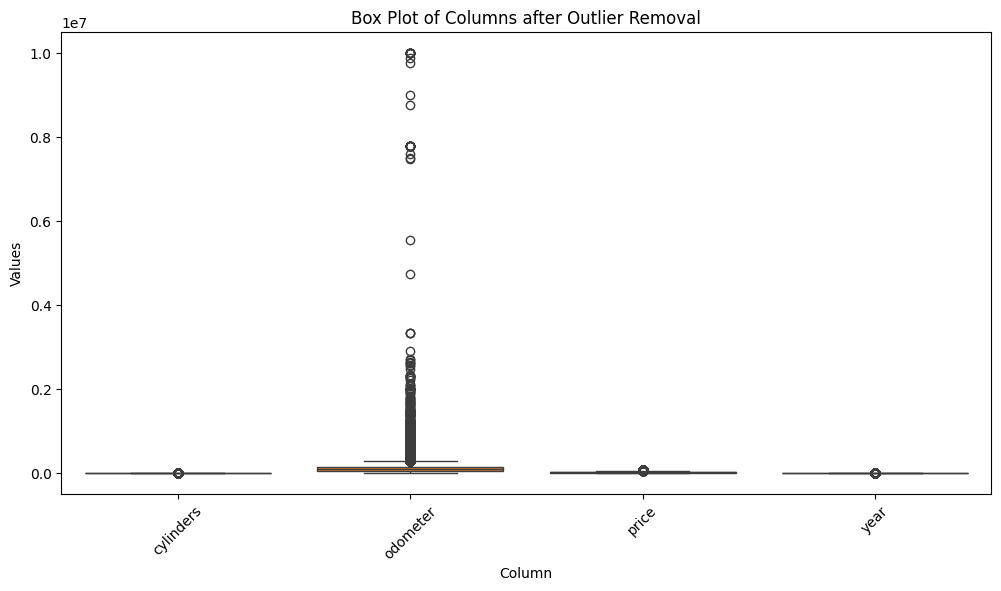

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
#boxplot before cleaning
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ucpp[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [77]:
columns_to_check = ['cylinders', 'odometer', 'price','year']

#function to remove outliers based on IQR
def remove_outliers(ucpp, column):
    Q1 = ucpp[column].quantile(0.25)
    Q3 = ucpp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = ucpp.loc[(ucpp[column] > lower_bound) & (ucpp[column] < upper_bound)]
    return df_out

# Loop through columns and remove outliers
for column in columns_to_check:
    ucpp = remove_outliers(ucpp, column)

In [78]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas


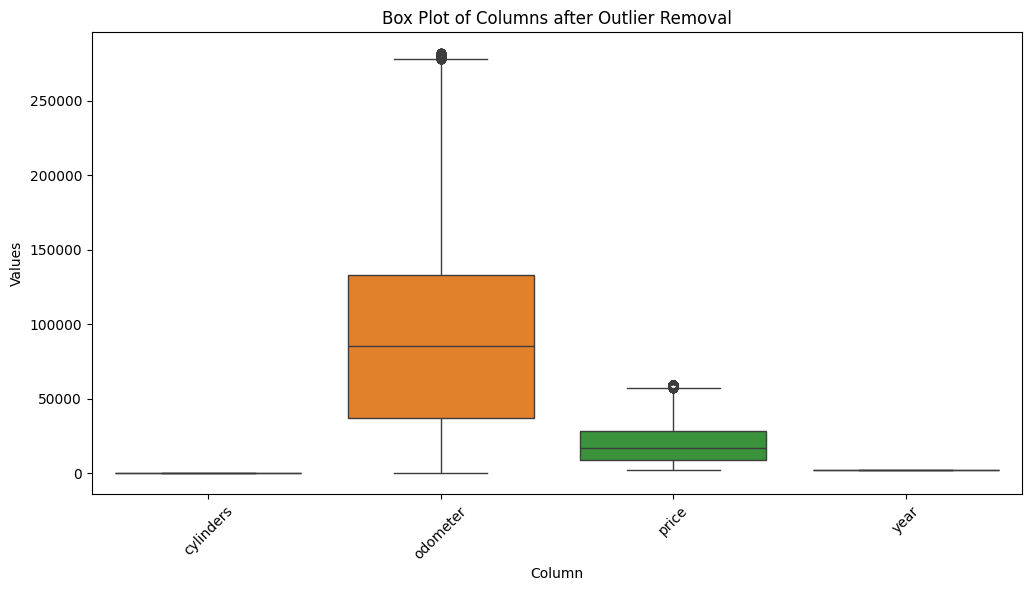

In [79]:
columns_for_boxplot = ['cylinders', 'odometer', 'price','year']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=ucpp[columns_for_boxplot])
plt.title('Box Plot of Columns after Outlier Removal')
plt.xlabel('Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [80]:
ucpp['vehicle_age'] = 2022 - ucpp['year']
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,vehicle_age
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,8
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,12
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,2
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas,5
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas,3
310506,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas,2
310507,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel,2
310508,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas,4


In [88]:
ucpp.reset_index(drop=True, inplace=True)

In [91]:
ucpp

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,vehicle_age
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,8
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,12
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,2
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas,5
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297996,wyoming,2019,nissan,♿,good,6,32226.0,clean,other,fwd,sedan,white,wy,23590,gas,3
297997,wyoming,2020,volvo,♿,good,6,12029.0,clean,other,fwd,sedan,red,wy,30590,gas,2
297998,wyoming,2020,cadillac,♿,good,6,4174.0,clean,other,fwd,hatchback,white,wy,34990,diesel,2
297999,wyoming,2018,lexus,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,good,6,30112.0,clean,other,fwd,sedan,silver,wy,28990,gas,4


In [92]:
ucpp['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [94]:
print(len(ucpp))


298001


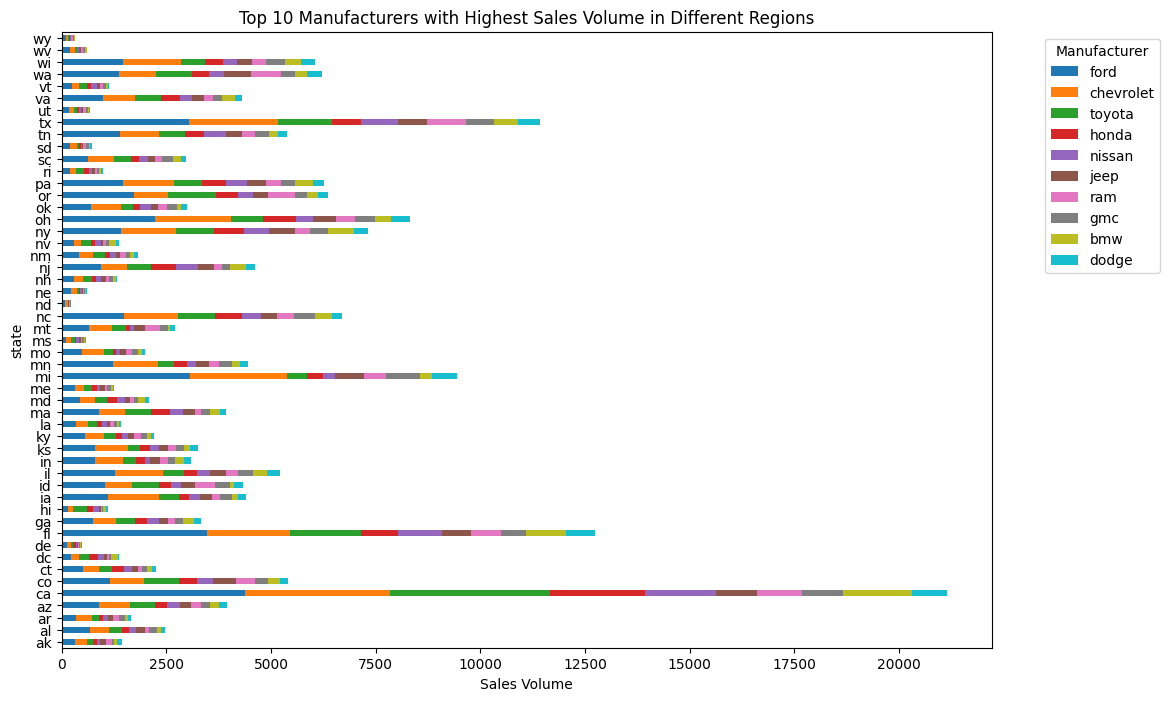

In [128]:
import pandas as pd
import matplotlib.pyplot as plt


top_manufacturers_by_region = ucpp.groupby(['state', 'manufacturer']).size().unstack()
top_manufacturers_by_region_total = top_manufacturers_by_region.sum(axis=0).sort_values(ascending=False)[:10]

top_manufacturers_by_region_filtered = top_manufacturers_by_region[top_manufacturers_by_region_total.index]
top_manufacturers_by_region_filtered.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Sales Volume')
plt.ylabel('state')
plt.title('Top 10 Manufacturers with Highest Sales Volume in Different Regions')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Insight:
The plot shows the top 10 manufacturers with the highest sales volume in various regions. It provides a clear picture of which manufacturers are leading in terms of sales across different states.

Impact:
This insight is crucial for understanding market trends and consumer preferences. It helps in identifying manufacturers that have strong market presence and are popular among customers in specific regions. This information can guide strategic decision-making in areas such as inventory management, marketing campaigns, and partnership opportunities.

Action:

Prioritize Partnerships: Collaborate with the top manufacturers to strengthen partnerships and capitalize on their popularity to drive sales.
Marketing Strategies: Tailor marketing strategies and promotions based on the popularity of manufacturers in different regions to attract more customers.
Inventory Management: Adjust inventory levels based on the demand for vehicles from top manufacturers to ensure optimal stock availability.
Customer Insights: Use this data to gain insights into customer preferences and preferences for specific manufacturers, allowing for targeted product offerings and improved customer satisfaction.


In [131]:
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'Condition': ucpp['condition'],
    'Price': ucpp['price']  # Example prices
}
df = pd.DataFrame(data)

# Group by Condition and calculate average price
avg_price_by_condition = df.groupby('Condition')['Price'].mean().reset_index()

# Calculate price variability (standard deviation) within each condition group
price_variability_by_condition = df.groupby('Condition')['Price'].std().reset_index()
price_variability_by_condition.rename(columns={'Price': 'Price Variability'}, inplace=True)

# Merge average price and price variability into a single DataFrame
price_sensitivity = pd.merge(avg_price_by_condition, price_variability_by_condition, on='Condition')

# Print the price sensitivity analysis
print(price_sensitivity)


   Condition         Price  Price Variability
0  excellent  17013.019895       11637.693722
1       fair   4773.750680        3854.069053
2       good  21511.442918       12727.361167
3   like new  20674.453711       14031.184833
4        new  27276.252480       15449.822950
5    salvage   6683.517110        5601.706836


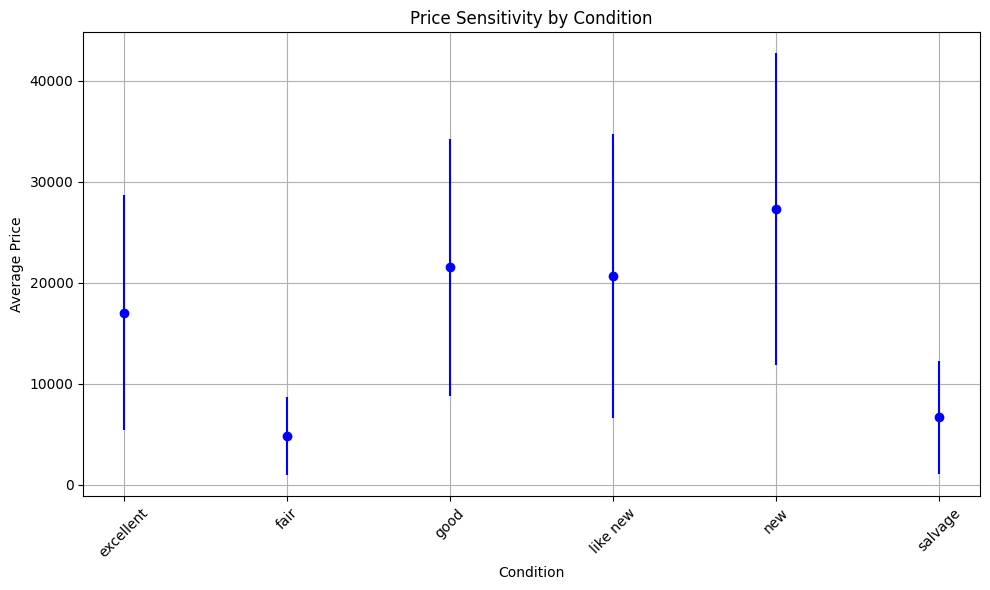

In [134]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    'Condition': ucpp['condition'],
    'Price': ucpp['price']  # Example prices
}
df = pd.DataFrame(data)

# Group by Condition and calculate average price
avg_price_by_condition = df.groupby('Condition')['Price'].mean().reset_index()

# Calculate price variability (standard deviation) within each condition group
price_variability_by_condition = df.groupby('Condition')['Price'].std().reset_index()
price_variability_by_condition.rename(columns={'Price': 'Price Variability'}, inplace=True)

# Merge average price and price variability into a single DataFrame
price_sensitivity = pd.merge(avg_price_by_condition, price_variability_by_condition, on='Condition')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(price_sensitivity['Condition'], price_sensitivity['Price'],
             yerr=price_sensitivity['Price Variability'], fmt='o', color='blue')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Price Sensitivity by Condition')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Insight:
The plot illustrates the price sensitivity of used cars based on their condition, showcasing the average price for each condition category along with the variability in prices within each category.

Impact:
Understanding price sensitivity by condition is crucial for pricing strategies in the used car market.
It provides insights into how customers perceive and value cars in different conditions, influencing their purchasing decisions.
It helps identify which condition categories are more price-sensitive, allowing businesses to adjust pricing strategies accordingly.

Action Plan:

Pricing Adjustment:
Consider adjusting prices for condition categories with higher price variability to align with market demand and customer expectations.
Implement dynamic pricing strategies that factor in both average prices and price variability to maximize revenue and profitability.

Marketing and Sales:
Utilize price sensitivity insights from the analysis in marketing campaigns to highlight the value propositions of cars in various conditions.
Develop targeted promotions and discounts for condition categories that exhibit higher price sensitivity, attracting cost-conscious buyers and boosting sales.

Inventory Management and Customer Segmentation:
Optimize inventory levels by stocking more cars in condition categories with high demand and less price variability based on price sensitivity analysis.
Segment customers based on their sensitivity to price and condition, allowing for tailored offerings and pricing strategies to meet diverse preferences and enhance customer satisfaction and loyalty.

C:\Users\ishik\AppData\Local\Temp\ipykernel_14012\3111517726.py:57: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 2000x800 with 0 Axes>

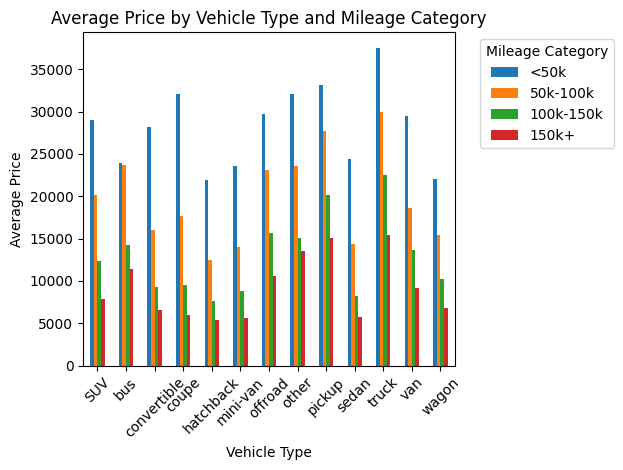

In [145]:
data = {
    'Price': ucpp['price'],
    'Mileage': ucpp['odometer'],
    'Vehicle Type': ucpp['type']  
}
df = pd.DataFrame(data)

# Define mileage categories based on ranges (customize as needed)
df['Mileage Category'] = pd.cut(df['Mileage'], bins=[0, 50000, 100000, 150000, float('inf')],
                                 labels=['<50k', '50k-100k', '100k-150k', '150k+'])

# Group by vehicle type and mileage category, calculate average price
avg_price_by_type_mileage = df.groupby(['Vehicle Type', 'Mileage Category'])['Price'].mean().unstack()

# Plotting
plt.figure(figsize=(20, 8))
avg_price_by_type_mileage.plot(kind='bar', stacked=False)
plt.title('Average Price by Vehicle Type and Mileage Category')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Mileage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Action:

For Buyers:

Identify the most cost-effective vehicle types based on mileage categories. Consider purchasing vehicles with lower mileage in the desired vehicle type to get better value for money.
Compare average prices across different vehicle types and mileage ranges to determine the best deals and negotiate prices effectively.
For Sellers:

Use the insights from the chart to set competitive prices for vehicles based on their type and mileage. Price vehicles competitively within each mileage category to attract more buyers.
Highlight vehicles with lower mileage in marketing campaigns to appeal to buyers looking for well-maintained used cars.
Consider offering discounts or promotions for vehicles with higher mileage to make them more appealing to budget-conscious buyers.
For Market Analysis:

Monitor market trends by analyzing changes in average prices across vehicle types and mileage categories over time. Adjust pricing strategies accordingly to stay competitive and meet market demand.
Keep track of customer preferences and buying behavior related to mileage and vehicle types to adapt inventory management and marketing strategies effectively.
Conduct regular market research to stay updated on pricing dynamics and adjust pricing strategies proactively to optimize sales and profitability.
User
give answer with regard to 1st person
ChatGPT
Insight:
As I analyze the plotted bar chart, I gain valuable insight into the average price of different vehicle types categorized by mileage ranges. This visualization enables me to understand how prices vary based on both the type of vehicle and its mileage, providing valuable insights into the pricing dynamics within the used car market.

Impact:
Understanding the relationship between vehicle type, mileage, and price is crucial for me as a buyer or seller in the used car industry. This information empowers me to make informed decisions when buying or selling a used car, ensuring that I can optimize my financial outcomes and meet my specific requirements.

In [72]:
ucpp['type'].unique()

array(['pickup', 'truck', 'other', 'SUV', 'coupe', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [73]:
ucpp['region'].value_counts()

region
central NJ               2604
denver                   2559
grand rapids             2497
ft myers / SW florida    2461
minneapolis / st paul    2459
                         ... 
meridian                   19
southwest MS               12
kansas city                 8
fort smith, AR              7
west virginia (old)         6
Name: count, Length: 403, dtype: int64

In [219]:
ucpp['region'].value_counts()

region
central NJ               2604
denver                   2559
grand rapids             2497
ft myers / SW florida    2461
minneapolis / st paul    2459
                         ... 
meridian                   19
southwest MS               12
kansas city                 8
fort smith, AR              7
west virginia (old)         6
Name: count, Length: 403, dtype: int64

In [221]:
ucpp['region'].nunique()

403

In [224]:
ucpp2=ucpp.copy()

In [228]:
from kmodes.kmodes import KModes
X = ucpp[['region']]

# Initialize the K-modes clustering algorithm with the desired number of clusters
n_clusters = 5  # Adjust the number of clusters as needed
kmodes = KModes(n_clusters=n_clusters, init='Cao', random_state=42)

# Fit the K-modes model to the data
clusters = kmodes.fit_predict(X)

# Add cluster labels to the DataFrame
ucpp['cluster_label'] = clusters

# View the results
print(ucpp.head())

   region  year manufacturer   model  condition  cylinders  odometer  \
0  auburn  2014          gmc       1       good          8   57923.0   
1  auburn  2010    chevrolet       1       good          8   71229.0   
2  auburn  2020    chevrolet  100000       good          8   19160.0   
3  auburn  2017       toyota  107566       good          8   41124.0   
4  auburn  2013         ford  123357  excellent          6  128000.0   

  title_status transmission drive    type paint_color state  price fuel  \
0        clean        other   4wd  pickup       white    al  33590  gas   
1        clean        other   4wd  pickup        blue    al  22590  gas   
2        clean        other   4wd  pickup         red    al  39590  gas   
3        clean        other   fwd  pickup         red    al  30990  gas   
4        clean    automatic   rwd   truck       black    al  15000  gas   

   cluster_label  
0              0  
1              0  
2              0  
3              0  
4              0  


In [229]:
ucpp.head()

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,cluster_label
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,0
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,0
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,0
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas,0
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,0


In [230]:
ucpp['cluster_label'].unique()

array([0, 1, 3, 2, 4], dtype=uint16)

In [231]:
encoder = OneHotEncoder()
clusters_onehot = encoder.fit_transform(ucpp[['cluster_label']]).toarray()

# Convert the one-hot encoded clusters to a DataFrame
clusters_df = pd.DataFrame(clusters_onehot, columns=[f'Cluster_{i+1}' for i in range(clusters_onehot.shape[1])])

# Concatenate the original DataFrame with the one-hot encoded clusters
ucpp_encoded_region = pd.concat([ucpp, clusters_df], axis=1)



In [232]:
ucpp_encoded_region.head()

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,...,paint_color,state,price,fuel,cluster_label,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,...,white,al,33590,gas,0,1.0,0.0,0.0,0.0,0.0
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,...,blue,al,22590,gas,0,1.0,0.0,0.0,0.0,0.0
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,...,red,al,39590,gas,0,1.0,0.0,0.0,0.0,0.0
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,...,red,al,30990,gas,0,1.0,0.0,0.0,0.0,0.0
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,...,black,al,15000,gas,0,1.0,0.0,0.0,0.0,0.0


In [233]:
ucpp_encoded_region['Cluster_1'].unique()

array([1., 0.])

In [234]:
cluster_names = {
    0: 'region_1',
    1: 'region_2',
    2: 'region_3',
    3: 'region_4',
    4: 'region_5'
}

# Rename the one-hot encoded columns using the cluster names
ucpp_encoded_region.rename(columns={f'Cluster_{i+1}': cluster_names[i] for i in range(len(cluster_names))}, inplace=True)

ucpp_encoded_region.head()

,region,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,...,paint_color,state,price,fuel,cluster_label,region_1,region_2,region_3,region_4,region_5
0,auburn,2014,gmc,1,good,8,57923.0,clean,other,4wd,...,white,al,33590,gas,0,1.0,0.0,0.0,0.0,0.0
1,auburn,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,...,blue,al,22590,gas,0,1.0,0.0,0.0,0.0,0.0
2,auburn,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,...,red,al,39590,gas,0,1.0,0.0,0.0,0.0,0.0
3,auburn,2017,toyota,107566,good,8,41124.0,clean,other,fwd,...,red,al,30990,gas,0,1.0,0.0,0.0,0.0,0.0
4,auburn,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,...,black,al,15000,gas,0,1.0,0.0,0.0,0.0,0.0


In [235]:
columns_to_drop=['region','cluster_label']
ucpp_encoded_region.drop(columns=columns_to_drop, inplace=True)

In [236]:
ucpp_encoded_region.head()

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,price,fuel,region_1,region_2,region_3,region_4,region_5
0,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,white,al,33590,gas,1.0,0.0,0.0,0.0,0.0
1,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,blue,al,22590,gas,1.0,0.0,0.0,0.0,0.0
2,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,red,al,39590,gas,1.0,0.0,0.0,0.0,0.0
3,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,red,al,30990,gas,1.0,0.0,0.0,0.0,0.0
4,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,al,15000,gas,1.0,0.0,0.0,0.0,0.0


In [240]:
ucpp_encoded_region['manufacturer'].value_counts()

manufacturer
ford          51018
chevrolet     38566
toyota        25952
honda         16122
nissan        14003
              ...  
Peterbilt         2
Fiat              2
Saab              1
Geo               1
Oldsmobile        1
Name: count, Length: 88, dtype: int64

In [244]:
Y = ucpp_encoded_region[['manufacturer']]

# Initialize the K-modes clustering algorithm with the desired number of clusters
  # Adjust the number of clusters as needed
kmodes = KModes(n_clusters=5, init='Cao', random_state=42)

# Fit the K-modes model to the data
clusters = kmodes.fit_predict(Y)

# Add cluster labels to the DataFrame
ucpp_encoded_region['cluster_label'] = clusters

clusters_onehot = encoder.fit_transform(ucpp_encoded_region[['cluster_label']]).toarray()

# Convert the one-hot encoded clusters to a DataFrame
clusters_df = pd.DataFrame(clusters_onehot, columns=[f'Cluster_{i+1}' for i in range(clusters_onehot.shape[1])])

# Concatenate the original DataFrame with the one-hot encoded clusters
ucpp_encoded_manufacturer = pd.concat([ucpp_encoded_region, clusters_df], axis=1)


In [245]:
ucpp_encoded_manufacturer.head()

,year,manufacturer,model,condition,cylinders,odometer,title_status,transmission,drive,type,...,region_2,region_3,region_4,region_5,cluster_label,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
0,2014,gmc,1,good,8,57923.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0
1,2010,chevrolet,1,good,8,71229.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
2,2020,chevrolet,100000,good,8,19160.0,clean,other,4wd,pickup,...,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0
3,2017,toyota,107566,good,8,41124.0,clean,other,fwd,pickup,...,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
4,2013,ford,123357,excellent,6,128000.0,clean,automatic,rwd,truck,...,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0


In [246]:
cluster_names = {
    0: 'manufacturer_1',
    1: 'manufacturer_2',
    2: 'manufacturer_3',
    3: 'manufacturer_4',
    4: 'manufacturer_5'
}

# Rename the one-hot encoded columns using the cluster names
ucpp_encoded_manufacturer.rename(columns={f'Cluster_{i+1}': cluster_names[i] for i in range(len(cluster_names))}, inplace=True)

columns_to_drop=['manufacturer','cluster_label']
ucpp_encoded_manufacturer.drop(columns=columns_to_drop, inplace=True)

ucpp_encoded_manufacturer.head()

,year,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,...,region_1,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5
0,2014,1,good,8,57923.0,clean,other,4wd,pickup,white,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2010,1,good,8,71229.0,clean,other,4wd,pickup,blue,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020,100000,good,8,19160.0,clean,other,4wd,pickup,red,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2017,107566,good,8,41124.0,clean,other,fwd,pickup,red,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [247]:
ucpp_encoded_manufacturer['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [273]:
ucpp_encoded_condition=ucpp_encoded_manufacturer.copy()

In [253]:
ucpp_encoded_manufacturer['condition'].value_counts()

condition
good         140650
excellent    140489
like new      23760
fair           4124
new            1211
salvage         276
Name: count, dtype: int64

In [274]:
# Define the unique values and their corresponding labels
value_labels = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'excellent': 3,
    'like new': 4,
    'new': 5
}

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Map the labels to the column based on the specified encoding
ucpp_encoded_condition['encoded_condition'] = ucpp_encoded_condition['condition'].map(value_labels)



In [275]:
ucpp_encoded_condition.head()

,year,model,condition,cylinders,odometer,title_status,transmission,drive,type,paint_color,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,encoded_condition
0,2014,1,good,8,57923.0,clean,other,4wd,pickup,white,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,1,good,8,71229.0,clean,other,4wd,pickup,blue,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,100000,good,8,19160.0,clean,other,4wd,pickup,red,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,107566,good,8,41124.0,clean,other,fwd,pickup,red,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,123357,excellent,6,128000.0,clean,automatic,rwd,truck,black,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [277]:
col_to_drop=['condition']
ucpp_encoded_condition.drop(columns=col_to_drop, inplace=True)

In [278]:
ucpp_encoded_condition.head()

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,encoded_condition
0,2014,1,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,1,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,100000,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,107566,8,41124.0,clean,other,fwd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,123357,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [281]:
# Rename the 'encoded_condition' column to 'condition'
ucpp_encoded_condition = ucpp_encoded_condition.rename(columns={'encoded_condition': 'condition'})

In [282]:
ucpp_encoded_condition.head()

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,region_2,region_3,region_4,region_5,manufacturer_1,manufacturer_2,manufacturer_3,manufacturer_4,manufacturer_5,condition
0,2014,1,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2010,1,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,2020,100000,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,2017,107566,8,41124.0,clean,other,fwd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2013,123357,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3


In [288]:
ucpp_encoded_condition['title_status'].unique()

array(['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only'],
      dtype=object)

In [296]:
encoded_title_status = encoder.fit_transform(ucpp_encoded_condition['title_status'].values.reshape(-1, 1))

# Convert the encoded array into a DataFrame
encoded_title_status_df = pd.DataFrame(encoded_title_status.toarray(), columns=encoder.categories_[0])

# Concatenate the encoded columns with the main dataset
ucpp_encoded_title = pd.concat([ucpp_encoded_condition, encoded_title_status_df], axis=1)

In [297]:
ucpp_encoded_title

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,manufacturer_3,manufacturer_4,manufacturer_5,condition,clean,lien,missing,parts only,rebuilt,salvage
0,2014,1,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
2,2020,100000,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
3,2017,107566,8,41124.0,clean,other,fwd,pickup,red,al,...,1.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
4,2013,123357,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,3,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,2019,♿,6,32226.0,clean,other,fwd,sedan,white,wy,...,0.0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0
310506,2020,♿,6,12029.0,clean,other,fwd,sedan,red,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
310507,2020,♿,6,4174.0,clean,other,fwd,hatchback,white,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0
310508,2018,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,6,30112.0,clean,other,fwd,sedan,silver,wy,...,0.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0


In [298]:
ucpp_encoded_title['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [299]:
encoded_transmission = encoder.fit_transform(ucpp_encoded_title['transmission'].values.reshape(-1, 1))

# Convert the encoded array into a DataFrame
encoded_transmission_df = pd.DataFrame(encoded_transmission.toarray(), columns=encoder.categories_[0])

# Concatenate the encoded columns with the main dataset
ucpp_encoded_transmission = pd.concat([ucpp_encoded_title, encoded_transmission_df], axis=1)

In [306]:
ucpp_encoded_transmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310510 entries, 0 to 310509
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            310510 non-null  int32  
 1   model           310510 non-null  object 
 2   cylinders       310510 non-null  int32  
 3   odometer        310510 non-null  float64
 4   title_status    310510 non-null  object 
 5   transmission    310510 non-null  object 
 6   drive           310510 non-null  object 
 7   type            310510 non-null  object 
 8   paint_color     310510 non-null  object 
 9   state           310510 non-null  object 
 10  price           310510 non-null  int64  
 11  fuel            310510 non-null  object 
 12  region_1        310510 non-null  float64
 13  region_2        310510 non-null  float64
 14  region_3        310510 non-null  float64
 15  region_4        310510 non-null  float64
 16  region_5        310510 non-null  float64
 17  manufactur

In [309]:
ucpp_encoded_transmission['drive'].value_counts()

drive
4wd    139372
fwd    112198
rwd     58940
Name: count, dtype: int64

In [310]:
ucpp_encoded_transmission['type'].value_counts()

type
sedan          86539
SUV            68881
pickup         52273
truck          29519
other          17942
hatchback      14749
coupe          14705
wagon           8883
van             6638
convertible     5551
mini-van        3990
bus              427
offroad          413
Name: count, dtype: int64

In [311]:
ucpp_encoded_transmission['paint_color'].value_counts()

paint_color
white     105397
black      70390
silver     42391
blue       27061
red        26022
grey       20211
green       5427
brown       5132
custom      5070
yellow      1495
orange      1436
purple       478
Name: count, dtype: int64

In [313]:
ucpp_encoded_transmission['state'].value_counts()

state
ca    34943
fl    20850
tx    17304
mi    14065
oh    13116
ny    12169
pa    10618
nc    10487
or     9742
wa     9281
wi     9218
co     8799
tn     8383
il     8143
nj     8025
va     6983
mn     6444
ma     6431
az     6372
id     6305
ia     6303
ga     5575
ks     4897
sc     4858
in     4834
ok     4599
ct     3975
mt     3912
al     3765
md     3712
ky     3391
nm     3125
mo     2997
nv     2477
dc     2373
ar     2327
la     2211
nh     2061
ak     2027
me     1875
hi     1869
ri     1778
vt     1761
ut      982
sd      958
wv      896
ne      861
ms      810
de      790
wy      501
nd      332
Name: count, dtype: int64

In [307]:
ucpp_encoded_transmission['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [321]:
ucpp_encoded_con4=ucpp_encoded_transmission.copy()

In [326]:
# Define the columns for one-hot encoding
columns_to_encode = ['drive', 'type', 'paint_color', 'state', 'fuel']

# Create an empty DataFrame to store the encoded data
encoded_data = pd.DataFrame()

# Iterate through each column and apply one-hot encoding
for column in columns_to_encode:
    
    
    # Fit and transform the current column using OneHotEncoder
    encoded_column = encoder.fit_transform(ucpp_encoded_con4[[column]]).toarray()
    
    # Get the feature names from the encoder
    feature_names = [f"{column}_{category}" for category in encoder.categories_[0]]
    
    # Convert the encoded column into a DataFrame with the appropriate column names
    encoded_column_df = pd.DataFrame(encoded_column, columns=feature_names)
    
    # Concatenate the encoded column with the existing encoded_data DataFrame
    encoded_data = pd.concat([encoded_data, encoded_column_df], axis=1)


In [328]:
encoded_data.head()

,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [329]:
final_encoded=pd.concat([ucpp_encoded_con4,encoded_data],axis=1)

In [330]:
final_encoded

,year,model,cylinders,odometer,title_status,transmission,drive,type,paint_color,state,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,2014,1,8,57923.0,clean,other,4wd,pickup,white,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010,1,8,71229.0,clean,other,4wd,pickup,blue,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,100000,8,19160.0,clean,other,4wd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,107566,8,41124.0,clean,other,fwd,pickup,red,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,123357,6,128000.0,clean,automatic,rwd,truck,black,al,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310505,2019,♿,6,32226.0,clean,other,fwd,sedan,white,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
310506,2020,♿,6,12029.0,clean,other,fwd,sedan,red,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
310507,2020,♿,6,4174.0,clean,other,fwd,hatchback,white,wy,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
310508,2018,𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼,6,30112.0,clean,other,fwd,sedan,silver,wy,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [331]:
final_encoded.drop(columns=columns_to_encode,inplace=True)

In [341]:
final_encoded.drop(columns=['title_status','transmission'],inplace=True)

In [342]:
final_ucpp=final_encoded.copy()

In [343]:
final_ucpp.drop(columns='model',inplace=True)

In [344]:
final_ucpp.head()

,year,cylinders,odometer,price,region_1,region_2,region_3,region_4,region_5,manufacturer_1,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,2014,8,57923.0,33590,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2010,8,71229.0,22590,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2020,8,19160.0,39590,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,8,41124.0,30990,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2013,6,128000.0,15000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


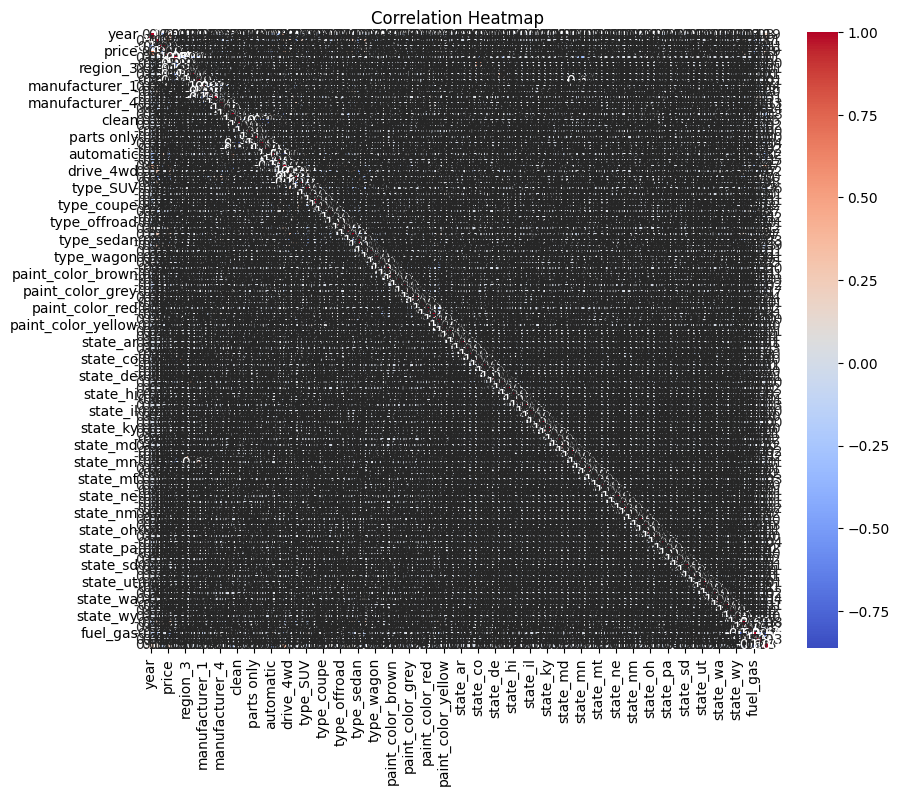

In [345]:
# Compute the correlation matrix
corr_matrix = final_ucpp.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [346]:
corr_matrix = final_ucpp.corr()
corr_matrix

,year,cylinders,odometer,price,region_1,region_2,region_3,region_4,region_5,manufacturer_1,...,state_vt,state_wa,state_wi,state_wv,state_wy,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
year,1.000000,0.099772,-0.353921,0.603298,0.005475,-0.017813,0.006864,0.009823,-0.009468,0.063986,...,0.001628,0.015971,-0.013889,0.013973,0.003652,-0.084935,0.042388,-0.096203,0.027401,0.187429
cylinders,0.099772,1.000000,-0.068166,0.523432,0.002133,-0.004880,-0.006435,0.010587,-0.003373,0.087275,...,-0.012639,0.031097,-0.000374,0.021471,0.013232,0.178220,0.014999,-0.179786,-0.069046,0.108371
odometer,-0.353921,-0.068166,1.000000,-0.298477,-0.004686,0.009264,0.007057,-0.014545,0.007315,-0.044000,...,0.001998,-0.011391,0.001814,-0.008789,-0.001148,0.109247,-0.031923,0.012744,-0.006360,-0.107162
price,0.603298,0.523432,-0.298477,1.000000,0.010117,-0.010883,-0.003843,0.016317,-0.021477,0.107777,...,-0.008978,0.078702,-0.026463,0.025134,0.010510,0.248812,0.033608,-0.303547,-0.031345,0.192084
region_1,0.005475,0.002133,-0.004686,0.010117,1.000000,-0.500337,-0.494189,-0.490585,-0.490384,-0.007168,...,0.013760,0.031980,0.031868,0.009801,0.007324,0.009201,0.002798,-0.014271,0.000090,0.010349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel_diesel,-0.084935,0.178220,0.109247,0.248812,0.009201,-0.001080,-0.001372,-0.005867,-0.009952,0.100152,...,0.006403,0.032623,-0.008495,0.005082,0.013267,1.000000,-0.017932,-0.601289,-0.031281,-0.077806
fuel_electric,0.042388,0.014999,-0.031923,0.033608,0.002798,-0.001388,-0.002863,0.002066,-0.003332,-0.000024,...,-0.000636,-0.001166,-0.001371,-0.001847,-0.001522,-0.017932,1.000000,-0.152955,-0.007957,-0.019792
fuel_gas,-0.096203,-0.179786,0.012744,-0.303547,-0.014271,0.002366,0.012727,-0.001518,0.014673,-0.074401,...,0.007351,0.009384,0.018182,-0.014104,-0.010261,-0.601289,-0.152955,1.000000,-0.266811,-0.663642
fuel_hybrid,0.027401,-0.069046,-0.006360,-0.031345,0.000090,0.004281,-0.002230,-0.002717,0.000418,-0.062032,...,0.004020,-0.006683,-0.007217,-0.004788,-0.001284,-0.031281,-0.007957,-0.266811,1.000000,-0.034525


In [347]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming final_ucpp is your DataFrame with features and target variable
# X contains features, y contains the target variable
X = final_ucpp.drop('price', axis=1)  # Adjust the target column name
y = final_ucpp['price']  # Adjust the target column name

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_dt = decision_tree_reg.predict(X_test)
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, y_pred_linear)
linear_reg_r2 = r2_score(y_test, y_pred_linear)

dt_reg_mse = mean_squared_error(y_test, y_pred_dt)
dt_reg_r2 = r2_score(y_test, y_pred_dt)

rf_reg_mse = mean_squared_error(y_test, y_pred_rf)
rf_reg_r2 = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Linear Regression:")
print(f"MSE: {linear_reg_mse}")
print(f"R-squared: {linear_reg_r2}")
print()

print("Decision Tree Regression:")
print(f"MSE: {dt_reg_mse}")
print(f"R-squared: {dt_reg_r2}")
print()

print("Random Forest Regression:")
print(f"MSE: {rf_reg_mse}")
print(f"R-squared: {rf_reg_r2}")


Linear Regression:
MSE: 54309679.74089892
R-squared: 0.6992520025732472

Decision Tree Regression:
MSE: 29965528.992380355
R-squared: 0.8340613887011198

Random Forest Regression:
MSE: 17006455.2095793
R-squared: 0.9058242034935615


In [348]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import numpy as np

# Assume X_train, X_test, y_train, y_test are your training and testing data

# Initialize base models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Train base models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions using base models
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Stack predictions as meta-features
meta_features = np.column_stack((linear_reg_pred, decision_tree_pred, random_forest_pred))

# Initialize meta-model (stacking regressor)
meta_model = RandomForestRegressor()

# Train meta-model using meta-features and actual target values
meta_model.fit(meta_features, y_test)

# Make predictions using the stacked model
stacked_pred = meta_model.predict(meta_features)

# Evaluate the performance of the stacked model
mse_stacked = mean_squared_error(y_test, stacked_pred)
r2_stacked = r2_score(y_test, stacked_pred)

print("Stacked Model MSE:", mse_stacked)
print("Stacked Model R-squared:", r2_stacked)


Stacked Model MSE: 2564866.960851916
Stacked Model R-squared: 0.9857966645021228
